# Project - Fake -News Detection 

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

In [66]:
#lets import pandas library to read the data
import pandas as pd
df = pd.read_csv('train_news.csv')
df

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

Here in this dataset we have train csv file. So to build a model using Machine Learning in order to predict the actual value we have to do preprocessing on train dataset and predict the output.

In [39]:
#Check the columns name
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [42]:
#Lets check the null value is present in any of the column
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

There are some null values present in this dataset. So we have fill this.

In [43]:
df = df.fillna('')

In [44]:
df.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

Now there are no any null values

In [45]:
#lets check the datatypes of each column
df.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [46]:
df.describe()   #Calculates the data statistically of all columns

Unnamed: 0            id         label
count  20800.000000  20800.000000  20800.000000
mean   10399.500000  10399.500000      0.500625
std     6004.587135   6004.587135      0.500012
min        0.000000      0.000000      0.000000
25%     5199.750000   5199.750000      0.000000
50%    10399.500000  10399.500000      1.000000
75%    15599.250000  15599.250000      1.000000
max    20799.000000  20799.000000      1.000000

From above we can say that all values for each column is different. There are no more difference in 75% values and max value , so we can say that our data is proper.

# EDA

In this step we have to do the analysis of each column using univariate method. So for this I have used Count method to check the number of unique values present in that particular column and also some visualization libraries to understand our data more clearly.

1    10413
0    10387
Name: label, dtype: int64


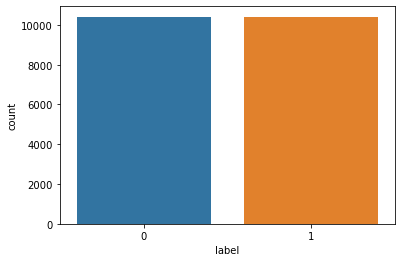

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df['label'].value_counts()
print(a)
sns.countplot(x = 'label',data = df)

# Correlation between columns

In [49]:
df.corr()  #find the pairwise correlation of all columns in the dataframe

Unnamed: 0       id     label
Unnamed: 0    1.000000  0.00345  0.004828
id            0.003450  1.00000  0.001140
label         0.004828  0.00114  1.000000

In [50]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

# Text cleaning and preprocessing

1.converting all letters to lower or upper case.

2.converting numbers into words or removing numbers.

3.removing punctuations, accent marks and other diacritics.

4.removing white spaces.

5.expanding abbreviations.

6.removing stop words, sparse terms, and particular words

In [67]:
#Import some libraries
import re
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords    #check the list of stopwords 

In [68]:
# resetting indexes
df.reset_index(inplace = True,drop = True)
df.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [74]:
#defining dependent and independent vectors
x = df.iloc[:,2:3]
y = df['label']   #this is target variable

In [75]:
x.head()

headline
0  Ethics Questions Dogged Agriculture Nominee as...
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2  Cotton to House: ’Do Not Walk the Plank and Vo...
3  Paul LePage, Besieged Maine Governor, Sends Co...
4                       A Digital 9/11 If Trump Wins

In [79]:
#Text Cleaning and preprocessing

cleaned = []
for i in range(0,len(x)):
    
    #removing words any other than (a-z) and (A-Z)
    text = re.sub('[^a-zA-Z]',' ', x['headline'][i])
    
    #converting all words into lower case
    text = text.lower()
    
    #tokenizing 
    text = text.split()
    
    #stemming and removing stopwords
    ps = PorterStemmer()
    text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
    text = ' '.join(text)
    cleaned.append(text)

In [16]:
#cleaned text
cleaned[:5]

['ethic question dog agricultur nomine georgia governor new york time',
 'u must dig deep stop argentina lionel messi new york time',
 'cotton hous walk plank vote bill cannot pass senat breitbart',
 'paul lepag besieg main governor send conflict signal intent new york time',
 'digit trump win']

In [17]:
#taking dictionary size 5000
vocab_size = 5000

#one hot encoding
one_hot_dir = [one_hot(words,vocab_size) for words in cleaned]

#length of all rows should be equal therefore applying padding
#this will adjust size by adding 0 at starting of the shorter rows
embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
embedded_layer

array([[   0,    0,    0, ..., 3253, 2494, 2181],
       [   0,    0,    0, ..., 3253, 2494, 2181],
       [   0,    0,    0, ..., 3874, 3369, 1813],
       ...,
       [   0,    0,    0, ..., 4403, 2300, 4220],
       [   0,    0,    0, ..., 3253, 2494, 2181],
       [   0,    0,    0, ..., 1093,  884, 1813]])

In [18]:
#converting into numpy arrays.
x = np.array(embedded_layer)
y = np.array(y)

In [19]:
#splitting the Dataset into Train and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
#creating model using LSTM
model = Sequential()

#taking number features as 50
model.add(Embedding(vocab_size,50,input_length = len(embedded_layer[0])))
model.add(Dropout(0.5))

#adding LSTM layers with 100 neurons
model.add(LSTM(100))
model.add(Dropout(0.5))

#adding output layer 
model.add(Dense(1,activation="sigmoid"))

#compiling the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
#summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 47, 50)            250000    
_________________________________________________________________
dropout (Dropout)            (None, 47, 50)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 310,501
Trainable params: 310,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
#training the model
model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 5, batch_size = 32)

Epoch 1/5
520/520 [==============================] - 28s 43ms/step - loss: 0.2632 - accuracy: 0.8893 - val_loss: 0.1737 - val_accuracy: 0.9320
Epoch 2/5
520/520 [==============================] - 22s 42ms/step - loss: 0.1453 - accuracy: 0.9425 - val_loss: 0.1713 - val_accuracy: 0.9356
Epoch 3/5
520/520 [==============================] - 21s 41ms/step - loss: 0.1102 - accuracy: 0.9587 - val_loss: 0.1778 - val_accuracy: 0.9325
Epoch 4/5
520/520 [==============================] - 22s 41ms/step - loss: 0.0875 - accuracy: 0.9683 - val_loss: 0.1996 - val_accuracy: 0.9296
Epoch 5/5
520/520 [==============================] - 22s 43ms/step - loss: 0.0694 - accuracy: 0.9757 - val_loss: 0.2249 - val_accuracy: 0.9303


From above we can  say that we are getting good accuracy above 97% with less than 1% loss.

In [23]:
#predicting and getting accuracy
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9302884615384616

In [24]:
#getting confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1896,  181],
       [ 109, 1974]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2077
           1       0.92      0.95      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



# Conclusion

1.In the experimentation phase two different parameters were employed for the proposed model development and their performances were evaluated.

2.From all above process we can say that whatever algorithms or method we used for prediction of our model all process with visualization is very beneficial. Using any visualization library it is easy for us to understand the all data.

3.Using some NLP techniques to clean our data it gives us more accuracy above 97%.